In [81]:
# imports
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine
from sql_config import protocol, username, password, host, port, database_name
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# create db connection and engine
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

In [3]:
# Read in the postgres table into a dataframe
df = pd.read_sql_query('select * from proj4_sch.app_data', con=engine)

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,244150,0,1,1,0,1,0,225000.0,792477.0,23301.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,133904,0,1,1,0,1,0,180000.0,314100.0,15241.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
2,418636,0,1,2,0,0,0,67500.0,254700.0,25321.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,442110,0,1,2,1,0,2,202500.0,400500.0,19264.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,102595,0,1,1,0,1,0,90000.0,152820.0,8901.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.describe(include = 'all').round(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,3.075110e+05,307511.000,307499.000,...,307511.000,307511.000,307511.000,307511.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,1.095,1.342,0.340,0.694,0.417,1.687979e+05,599026.000,27108.574,...,0.008,0.001,0.001,0.000,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.294,0.474,0.474,0.461,0.722,2.371231e+05,402490.777,14493.737,...,0.090,0.024,0.023,0.018,0.084,0.111,0.205,0.916,0.794,1.869
min,100002.000,0.000,1.000,1.000,0.000,0.000,0.000,2.565000e+04,45000.000,1615.500,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,189145.500,0.000,1.000,1.000,0.000,0.000,0.000,1.125000e+05,270000.000,16524.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,278202.000,0.000,1.000,1.000,0.000,1.000,0.000,1.471500e+05,513531.000,24903.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,367142.500,0.000,1.000,2.000,1.000,1.000,1.000,2.025000e+05,808650.000,34596.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
max,456255.000,1.000,2.000,3.000,1.000,1.000,19.000,1.170000e+08,4050000.000,258025.500,...,1.000,1.000,1.000,1.000,4.000,9.000,8.000,27.000,261.000,25.000


In [17]:
# build a list of all the int64 variable
string_cols = df.select_dtypes(include=['int64']).columns.tolist()
print(string_cols)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19

In [18]:
for col in string_cols:
      print(df[col].value_counts())

244150    1
119527    1
287437    1
119481    1
137138    1
         ..
283481    1
222831    1
396639    1
300298    1
132201    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
0    282686
1     24825
Name: TARGET, dtype: int64
1    278232
2     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
1    202448
2    105059
3         4
Name: CODE_GENDER, dtype: int64
0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64
1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
10         2
8          2
19         2
9          2
12         2
11         1
Name: CNT_CHILDREN, dtype: int64
1    158774
3     71617
4     55362
2     21703
5        22
6        18
7        10
8         5
Name: NAME_INCOME_TYPE, dtype: int64
1    218391
2     74863
3     10277
4      3816
5       164
Name: NAME_EDUCATION_TYPE, dtype: int64
2    196432
1     45444
3     29775
5     19770
4     16088
6

---
# Transform - binning


#### Gender

In [37]:
df['CODE_GENDER'].value_counts()

1    202448
2    105059
3         4
Name: CODE_GENDER, dtype: int64

In [38]:
# remove genders other than M and F
df_clean = df[df['CODE_GENDER'] != 3]
df_clean.shape

(307507, 122)

#### CNT_CHILDREN

In [39]:
df_clean['CNT_CHILDREN'].value_counts()

0     215369
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
10         2
8          2
19         2
9          2
12         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [40]:
# Bin a column

col_to_bin = 'CNT_CHILDREN'         # name of the column
Cutoff = 500                        # cut off value for binning    
bin_number = 4                      # number/name of the collection bin

a = df_clean[col_to_bin].value_counts()
application_types_to_replace = a[a < Cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df_clean[col_to_bin] = df_clean[col_to_bin].replace(app,bin_number)

# Check to make sure binning was successful
df_clean[col_to_bin].value_counts()

C:\Users\jspinega\AppData\Local\Temp\ipykernel_28520\1871264448.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col_to_bin] = df_clean[col_to_bin].replace(app,bin_number)


0    215369
1     61118
2     26748
3      3717
4       555
Name: CNT_CHILDREN, dtype: int64

#### NAME_INCOME_TYPE

In [41]:
df_clean['NAME_INCOME_TYPE'].value_counts()

1    158771
3     71616
4     55362
2     21703
5        22
6        18
7        10
8         5
Name: NAME_INCOME_TYPE, dtype: int64

In [44]:
# drop income types greater than 4 (fewer than 22 records)
df_clean = df_clean[df_clean['NAME_INCOME_TYPE'] <= 4]
df_clean['NAME_INCOME_TYPE'].value_counts()

1    158771
3     71616
4     55362
2     21703
Name: NAME_INCOME_TYPE, dtype: int64

#### NAME_EDUCATION_TYPE

In [45]:
df_clean['NAME_EDUCATION_TYPE'].value_counts()

1    218389
2     74862
3     10276
4      3816
5       164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [47]:
# drop NAME_EDUCATION_TYPE greater than 4 (fewer than 22 records)
df_clean = df_clean[df_clean['NAME_EDUCATION_TYPE'] <= 4]
df_clean['NAME_EDUCATION_TYPE'].value_counts()

1    218363
2     74837
3     10272
4      3816
Name: NAME_EDUCATION_TYPE, dtype: int64

#### NAME_FAMILY_STATUS

In [48]:
df_clean['NAME_FAMILY_STATUS'].value_counts()

2    196292
1     45404
3     29758
5     19752
4     16080
6         2
Name: NAME_FAMILY_STATUS, dtype: int64

In [49]:
# drop NAME_FAMILY_STATUS greater than 5 
df_clean = df_clean[df_clean['NAME_FAMILY_STATUS'] <= 5]
df_clean['NAME_FAMILY_STATUS'].value_counts()

2    196292
1     45404
3     29758
5     19752
4     16080
Name: NAME_FAMILY_STATUS, dtype: int64

#### FLAG_MOBIL

In [60]:
df_clean['FLAG_MOBIL'].value_counts()

1    307285
0         1
Name: FLAG_MOBIL, dtype: int64

In [63]:
# drop this FLAG_MOBIL since there is not 
df_clean = df_clean.drop(columns = ['FLAG_MOBIL'])
df_clean.shape

(307286, 121)

#### Drop apartment average and mode variables

In [73]:
df_clean = df_clean.drop(columns = ['APARTMENTS_AVG'
      , 'BASEMENTAREA_AVG'
      , 'YEARS_BEGINEXPLUATATION_AVG'
      , 'YEARS_BUILD_AVG'
      , 'COMMONAREA_AVG'
      , 'ELEVATORS_AVG'
      , 'ENTRANCES_AVG'
      , 'FLOORSMAX_AVG'
      , 'FLOORSMIN_AVG'
      , 'LANDAREA_AVG'
      , 'LIVINGAPARTMENTS_AVG'
      , 'LIVINGAREA_AVG'
      , 'NONLIVINGAPARTMENTS_AVG'
      , 'NONLIVINGAREA_AVG'
      , 'APARTMENTS_MODE'
      , 'BASEMENTAREA_MODE'
      , 'YEARS_BEGINEXPLUATATION_MODE'
      , 'YEARS_BUILD_MODE'
      , 'COMMONAREA_MODE'
      , 'ELEVATORS_MODE'
      , 'ENTRANCES_MODE'
      , 'FLOORSMAX_MODE'
      , 'FLOORSMIN_MODE'
      , 'LANDAREA_MODE'
      , 'LIVINGAPARTMENTS_MODE'
      , 'LIVINGAREA_MODE'
      , 'NONLIVINGAPARTMENTS_MODE'
      , 'NONLIVINGAREA_MODE'])

# finished binning
---

---
# Prepare for machine learning

In [74]:
X = df_clean

<AxesSubplot: >

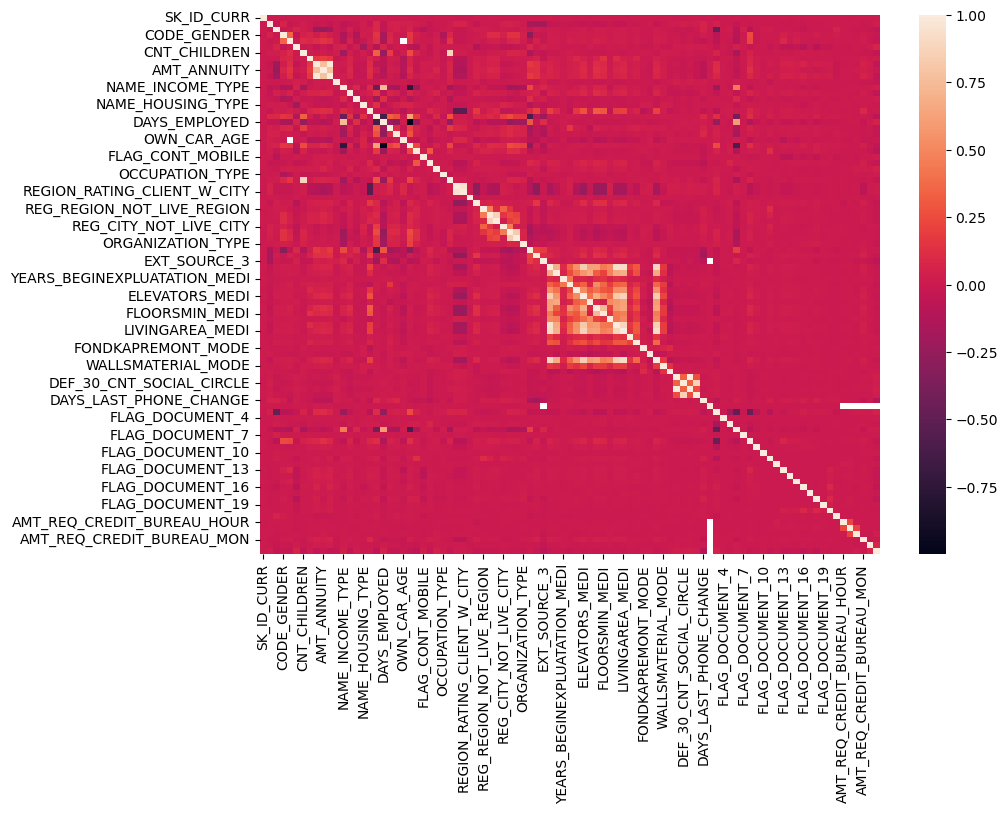

In [75]:
# looking to see if there are any variable that are highly correlated that may be preventing a more accurate model 
plt.figure(figsize=(10,7))
c= X.corr()
sns.heatmap(c)

# The correlation heat map below indicates the variables are not well separated.  

In [76]:
# Seperate out the dependent and independen variables
# Split our preprocessed data into our features and target arrays

# this is the target
y = X["TARGET"].values

# Drop y out of the dataframe to get the independent variables
# this is the feature list
X = X.drop("TARGET", axis=1)
independent_variables = X.columns
X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,244150,1,1,0,1,0,225000.0,792477.0,23301.0,661500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,133904,1,1,0,1,0,180000.0,314100.0,15241.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
2,418636,1,2,0,0,0,67500.0,254700.0,25321.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,442110,1,2,1,0,2,202500.0,400500.0,19264.5,400500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,102595,1,1,0,1,0,90000.0,152820.0,8901.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# Split the preprocessed data into a training and testing dataset
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [80]:
# there was only one value that needed Scaling ASK_AMT
# Therefore I scaled that variable earlier in the code so the whole data set could be exported for testing in other code.

# I Copied the dataframes to the the "standard names" so that "cut and Paste code would work"
X_train_scaled = X_train
X_test_scaled = X_test

In [82]:
clf = RandomForestClassifier(random_state=1, n_estimators=1000).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values